# <u>DA Lab3</u>

<h2>Analysis of Cereals Dataset</h2>

In [204]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

cereals = pd.read_excel("cereals1.xls")
cereals

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


<h2><i>Meta data-</i></h2>
<br>
<p> Cereal variables: cereal name [name] manufacturer (e.g., Kellogg's) [mfr] type (cold/hot) [type] calories (number) [calories] protein(g) [protein] fat(g) [fat] sodium(mg) [sodium] dietary fiber(g) [fiber] complex carbohydrates(g) [carbo] sugars(g) [sugars] display shelf (1, 2, or 3, counting from the floor) [shelf] potassium(mg) [potass] vitamins & minerals (0, 25, or 100, respectively indicating 'none added'; 'enriched, often to 25% FDA recommended'; '100% of FDA recommended') [vitamins] weight (in ounces) of one serving (serving size) [weight] cups per serving [cups] Manufacturers are represented by their first initial: A=American Home Food Products, G=General Mills, K=Kelloggs, N=Nabisco, P=Post, Q=Quaker Oats, R=Ralston Purina)</p>


<h3><i>1. Create a table with the 5-number summary of all the numeric attributes.</i></h3>

In [205]:
cereals[cereals.columns[3:]].describe().round(2)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00
mean,107.37,2.53,1.01,160.07,2.05,14.72,6.93,93.66,28.29,2.20,1.03,0.83,42.33
std,19.14,1.09,1.01,84.32,2.22,4.16,4.47,68.50,22.49,0.83,0.15,0.23,13.82
min,50.00,1.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,0.00,1.00,0.50,0.25,18.04
25%,100.00,2.00,0.00,132.50,0.75,12.00,3.00,40.00,25.00,1.00,1.00,0.67,32.93
50%,110.00,2.50,1.00,180.00,1.75,14.50,7.00,90.00,25.00,2.00,1.00,0.75,40.25
75%,110.00,3.00,2.00,212.50,3.00,17.00,11.00,120.00,25.00,3.00,1.00,1.00,50.78
max,160.00,6.00,5.00,320.00,14.00,23.00,15.00,330.00,100.00,3.00,1.50,1.50,93.70


In [206]:
df=cereals.describe()
df[3:8]


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
min,50.0,1.0,0.0,0.0,0.00,-1.0,-1.0,-1.0,0.0,1.0,0.5,0.25,18.042851
25%,100.0,2.0,0.0,132.5,0.75,12.0,3.0,40.0,25.0,1.0,1.0,0.67,32.932466
50%,110.0,2.5,1.0,180.0,1.75,14.5,7.0,90.0,25.0,2.0,1.0,0.75,40.253086
75%,110.0,3.0,2.0,212.5,3.00,17.0,11.0,120.0,25.0,3.0,1.0,1.00,50.780847
max,160.0,6.0,5.0,320.0,14.00,23.0,15.0,330.0,100.0,3.0,1.5,1.50,93.704912


<h3><i>2. For each of the numeric attributes (proteins upto vitamins) , identify and replace all 
missing data (indicated with -1) with the arithmetic mean of the attribute.
    </i></h3>

In [207]:
mean_p = cereals[cereals["potass"]>-1]
mean_potass = mean_p.potass.mean()

mean_c = cereals[cereals["carbo"]>-1]
mean_carbo = mean_c.carbo.mean()

mean_s = cereals[cereals["sugars"]>-1]
mean_sugars = mean_s.sugars.mean()

#cereals_mean = cereals.copy()

In [208]:
cereals["potass"] = cereals["potass"].apply(lambda x: x if x>0 else mean_potass)
cereals["carbo"] = cereals["carbo"].apply(lambda x: x if x>0 else mean_carbo)
cereals["sugars"] = cereals["sugars"].apply(lambda x: x if x>0 else mean_sugars)
cereals = cereals.round(2)
cereals

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.00,135.00,0,3,1.0,1.00,33.98
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5.00,320.00,25,3,1.0,0.33,59.43
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,7.04,330.00,25,3,1.0,0.50,93.70
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.00,96.22,25,3,1.0,0.75,34.38
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.00,70.00,25,1,1.0,0.75,29.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3.00,60.00,25,3,1.0,0.75,39.11
72,Trix,G,C,110,1,1,140,0.0,13.0,12.00,25.00,25,2,1.0,1.00,27.75
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.00,115.00,25,1,1.0,0.67,49.79
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3.00,110.00,25,1,1.0,1.00,51.59


<h3><i>3. Create a table with the 5-number summary of all the numeric attributes after treating 
missing values. Do you think the strategy used in dealing with missing values was 
    effective? </i></h3>

In [209]:
cereals[cereals.columns[3:]].describe().round(2)[3:8]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
min,50.0,1.0,0.0,0.0,0.00,7.00,1.00,15.00,0.0,1.0,0.5,0.25,18.04
25%,100.0,2.0,0.0,132.5,0.75,12.00,5.00,43.75,25.0,1.0,1.0,0.67,32.93
50%,110.0,2.5,1.0,180.0,1.75,14.96,7.04,90.00,25.0,2.0,1.0,0.75,40.25
75%,110.0,3.0,2.0,212.5,3.00,17.00,11.00,120.00,25.0,3.0,1.0,1.00,50.78
max,160.0,6.0,5.0,320.0,14.00,23.00,15.00,330.00,100.0,3.0,1.5,1.50,93.70


In [210]:
# When we compare the 5 value summary of dataset where negative values are replaced by mean and the other by median ,
# we can see that replacing by median is slightly better 

<h3><i>4. For each of the numeric attributes (proteins upto vitamins), identify and replace all 
    noisy data with the median of attribute.</i></h3>

In [211]:
num_col = ["calories","protein","fat","sodium","fiber","carbo","sugars","potass"]
for col in num_col:
    #print(col)
    q1 = cereals[col].quantile(0.15)
    q3 = cereals[col].quantile(0.85)
    iqr = q3-q1
    median = cereals[col].median()
    cereals[col] = cereals[col].mask((cereals[col] > (q3+1.5*iqr))|(cereals[col]< (q1-1.5*iqr)), median)
cereals.describe()[3:8]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
min,70.0,1.0,0.0,0.0,0.000,7.000,1.00,15.00,0.0,1.0,0.5,0.25,18.0400
25%,100.0,2.0,0.0,132.5,0.750,12.000,5.00,43.75,25.0,1.0,1.0,0.67,32.9300
50%,110.0,2.5,1.0,180.0,1.625,14.965,7.04,90.00,25.0,2.0,1.0,0.75,40.2550
75%,110.0,3.0,2.0,212.5,3.000,17.000,11.00,120.00,25.0,3.0,1.0,1.00,50.7775
max,160.0,6.0,5.0,320.0,6.000,23.000,15.00,330.00,100.0,3.0,1.5,1.50,93.7000


<h3><i>5. Create a table with the 5-number summary of all the numeric attributes after treating 
noisy values. Do you think the strategy used in dealing with noisy values was 
    effective? </i></h3>

In [212]:
cereals[cereals.columns[3:]].describe().round(2)[3:8]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
min,70.0,1.0,0.0,0.0,0.00,7.00,1.00,15.00,0.0,1.0,0.5,0.25,18.04
25%,100.0,2.0,0.0,132.5,0.75,12.00,5.00,43.75,25.0,1.0,1.0,0.67,32.93
50%,110.0,2.5,1.0,180.0,1.62,14.96,7.04,90.00,25.0,2.0,1.0,0.75,40.25
75%,110.0,3.0,2.0,212.5,3.00,17.00,11.00,120.00,25.0,3.0,1.0,1.00,50.78
max,160.0,6.0,5.0,320.0,6.00,23.00,15.00,330.00,100.0,3.0,1.5,1.50,93.70


<h3><i>6.  Cross tabulate the type of cereal (hot vs cold) against the manufacturer</i></h3>

In [213]:
pd.crosstab(cereals.type,cereals.mfr)

mfr,A,G,K,N,P,Q,R
type,,,,,,,
C,0,22,23,4,9,7,8
H,1,0,0,1,0,1,0


<h3><i>7. Which is the cereal with the best rating, worst rating?</i></h3>

In [214]:
# Cereal with best rating
cereals[cereals.rating == cereals.rating.max()].name

2    All-Bran_with_Extra_Fiber
Name: name, dtype: object

In [215]:
# Cereal with worst rating
cereals[cereals.rating == cereals.rating.min()].name

9    Cap'n'Crunch
Name: name, dtype: object

<h3><i>8. Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals.</i></h3>

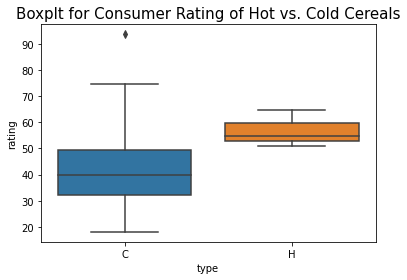

In [216]:
plt.figure()
sns.boxplot(data=cereals,x="type",y="rating")
plt.title("Boxplt for Consumer Rating of Hot vs. Cold Cereals",fontsize=15)
plt.show()

<h3><i>9. Is there a relation between sugars, calories, carbo, and fat?</i></h3>

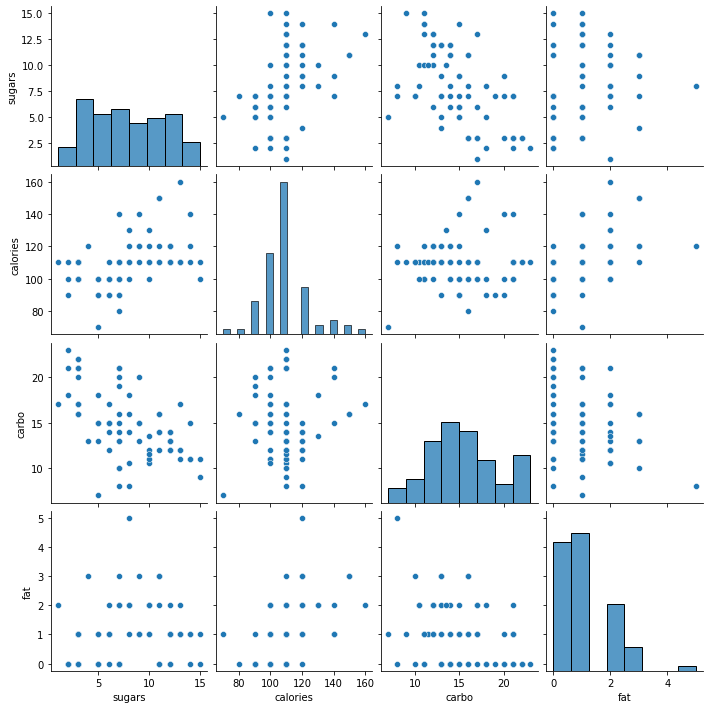

In [217]:
sns.pairplot(cereals[["sugars","calories","carbo","fat"]])

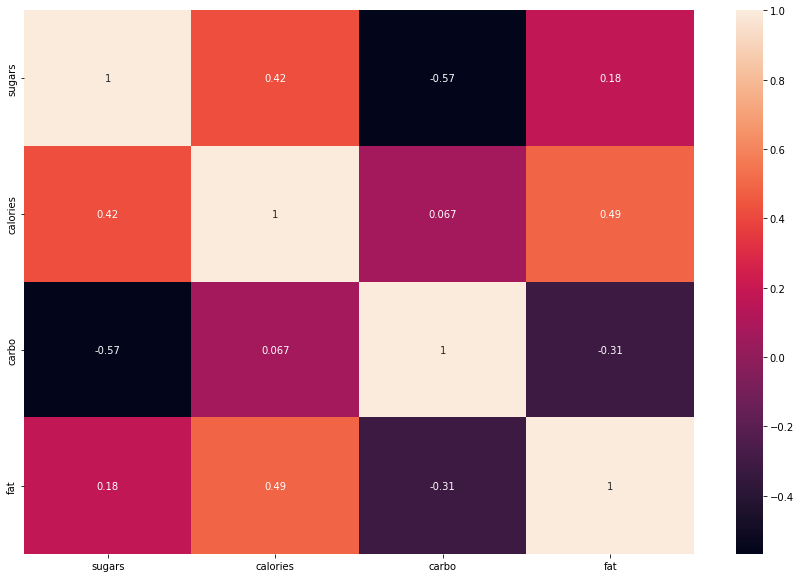

In [218]:
plt.figure(figsize=(15,10))
corrMatrix = cereals[["sugars","calories","carbo","fat"]].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Here we can see that carbohydrates and sugar has moderately negative correlation(-0.57) while fat and calories has a moderately positive correlation(0.49)

<h3><i>10. Which manufacturers produce cereal with highest calories?</i></h3>

In [219]:
cereals[cereals["calories"]==cereals["calories"].max()].mfr

45    K
Name: mfr, dtype: object

Hence Kelloggs produces cereal with highest calories

<h3><i>11. Use correlation tests and visualization to identify if the two variables calories and 
    consumer rating associated </i></h3>

In [220]:
correlation1 = cereals["calories"].corr(cereals["rating"])
correlation1

-0.5064816807582583

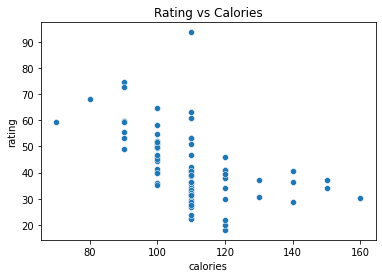

In [221]:
plt.figure()
sns.scatterplot(data=cereals,x="calories",y="rating")
plt.title("Rating vs Calories")
plt.show()

 Since the correlation value is less than -0.6 we can say that there exists a moderately negative correlation between 
 Calories and Consumer Rating ie; as the calories increases the customer rating decreases

<h3><i>12. Use correlation tests and visualization to identify if the two variables shelf and 
    consumer rating associated?</i></h3>

In [222]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels =[0,1,2,3,4,5,6,7,8,9]
cereals['bin_rating'] = pd.cut(cereals['rating'], bins,labels=labels)
cereals=pd.DataFrame(cereals)
cereals

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,bin_rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.00,8.0,8.00,135.00,0,3,1.0,1.00,33.98,3
1,All-Bran,K,C,70,4,1,260,1.75,7.0,5.00,320.00,25,3,1.0,0.33,59.43,5
2,All-Bran_with_Extra_Fiber,K,C,110,4,0,140,1.75,8.0,7.04,330.00,25,3,1.0,0.50,93.70,9
3,Almond_Delight,R,C,110,2,2,200,1.00,14.0,8.00,96.22,25,3,1.0,0.75,34.38,3
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.50,10.5,10.00,70.00,25,1,1.0,0.75,29.51,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.00,21.0,3.00,60.00,25,3,1.0,0.75,39.11,3
72,Trix,G,C,110,1,1,140,0.00,13.0,12.00,25.00,25,2,1.0,1.00,27.75,2
73,Wheat_Chex,R,C,100,3,1,230,3.00,17.0,3.00,115.00,25,1,1.0,0.67,49.79,4
74,Wheaties,G,C,100,3,1,200,3.00,17.0,3.00,110.00,25,1,1.0,1.00,51.59,5


In [223]:
from scipy.stats import chi2_contingency 
 
contigency= pd.crosstab(cereals['bin_rating'], cereals['shelf'])
contigency

shelf,1,2,3
bin_rating,,,
1,0,2,0
2,2,8,1
3,4,6,14
4,7,1,11
5,4,3,6
6,1,1,2
7,2,0,0
9,0,0,1


In [224]:
c, p, dof, expected = chi2_contingency(contigency)
print("chi-sq value: ",c)
print("p-value: ",p)

chi-sq value:  30.381102231102233
p-value:  0.006760631989918355


Since Chi-Sq value is greater than critical value and p-value is less than 0.05 we reject the null hypothesis that Shelf and Ratings are independent at 95% level of significance<br>
Therefore there exits a relationship between Shelf and Ratings

<h3><i>13. Is there a relation between manufacturer and rating?</i></h3>

In [225]:
contigency = pd.crosstab(cereals["bin_rating"],cereals["mfr"])
c, p, dof, expected = chi2_contingency(contigency)
print("chi-sq value: ",c)
print("p-value: ",p)

chi-sq value:  84.12743490954955
p-value:  0.00012274524580161342


Since Chi-Sq value is greater than critical value and p-value is less than 0.05 we reject the null hypothesis that Manufacturer and Ratings are independent at 95% level of significance<br>
Therefore there is a relationship between Manufacturer and Ratings

<h3><i>14. Which nutrients are essential for a good rating for a cereal</i></h3>

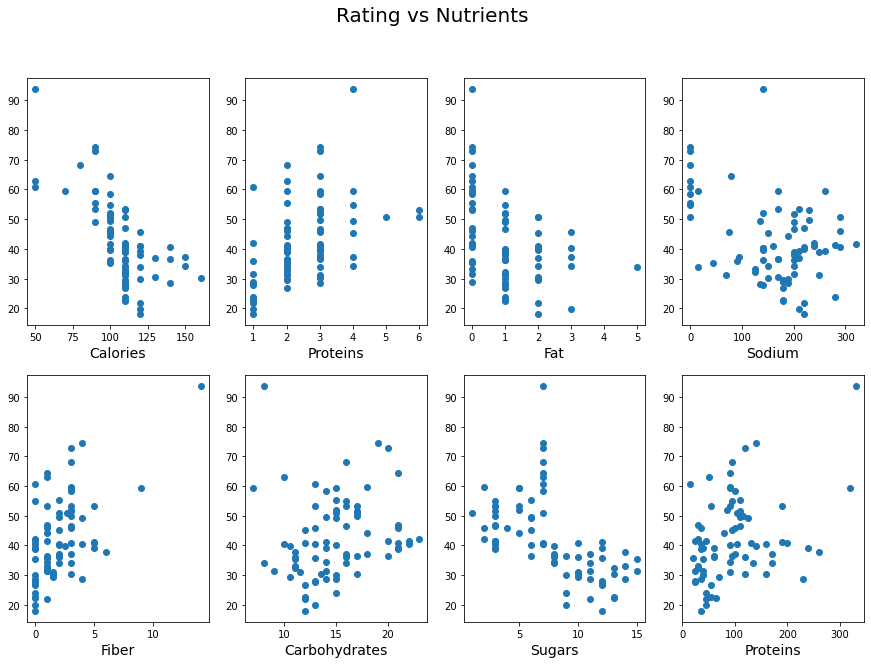

In [188]:
fig, ax = plt.subplots(2,4,figsize = (15, 10))
plt.suptitle("Rating vs Nutrients",fontsize=20)
ax[0][0].scatter(x="calories",y="rating",data=cereals_median)
ax[0][0].set_xlabel("Calories",fontsize=14)

ax[0][1].scatter(x="protein",y="rating",data=cereals_median)
ax[0][1].set_xlabel("Proteins",fontsize=14)

ax[0][2].scatter(x="fat",y="rating",data=cereals_median)
ax[0][2].set_xlabel("Fat",fontsize=14)

ax[0][3].scatter(x="sodium",y="rating",data=cereals_median)
ax[0][3].set_xlabel("Sodium",fontsize=14)

ax[1][0].scatter(data=cereals_median,x="fiber",y="rating")
ax[1][0].set_xlabel("Fiber",fontsize=14)

ax[1][1].scatter(data=cereals_median,x="carbo",y="rating")
ax[1][1].set_xlabel("Carbohydrates",fontsize=14)

ax[1][2].scatter(data=cereals_median,x="sugars",y="rating")
ax[1][2].set_xlabel("Sugars",fontsize=14)

ax[1][3].scatter(data=cereals_median,x="potass",y="rating")
ax[1][3].set_xlabel("Proteins",fontsize=14)
plt.show()

calories   -0.844155
protein     0.731563
fat        -0.553094
sodium     -0.504999
fiber       0.593225
carbo       0.203090
sugars     -0.669876
potass      0.529501
vitamins   -0.414012
rating      1.000000
Name: rating, dtype: float64


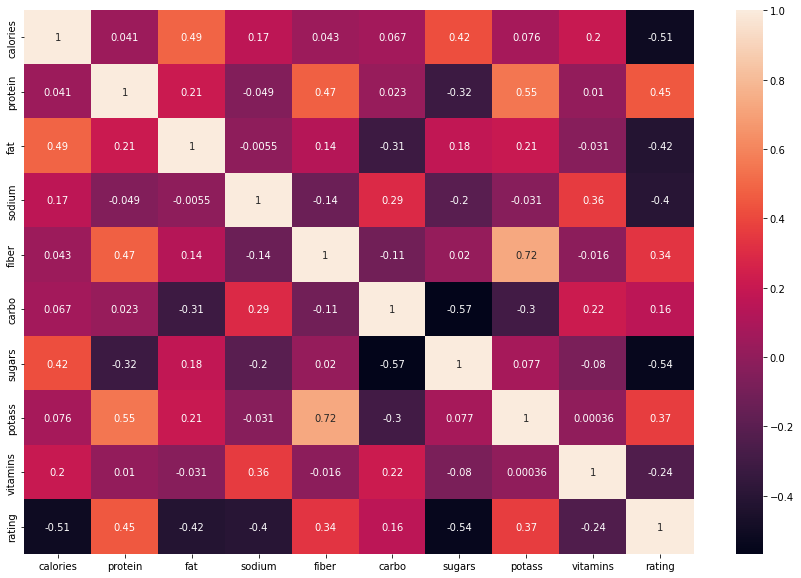

In [229]:
plt.figure(figsize=(15,10))
corrMatrix = cereals[["calories","protein","fat","sodium","fiber","carbo","sugars","potass","vitamins","rating"]].corr()
print(corrMatrix.corr()["rating"])
sns.heatmap(corrMatrix, annot=True)
plt.show()

We can see that the nutrients Fiber, Potass and Proteins are essential for good cusumer rating

<h3><i>15. Design a Linear regression model to predict the rating of a cereal based on top 3 related nutrients. Tabulate the accuracy of the model using a 80,20 split</i></h3>

In [235]:
y = cereals["rating"]
X = cereals[["fiber","carbo","protein"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test,y_test))

-0.47636557630345555


In [249]:
y_train

9     18.04
5     33.17
34    21.87
22    44.33
30    23.80
40    45.33
39    39.24
16    35.78
64    72.80
54    63.01
31    52.08
7     49.12
62    68.24
44    34.14
72    27.75
49    59.64
75    36.19
19    64.53
63    74.47
25    58.35
42    54.85
13    22.74
55    49.51
3     34.38
17    22.40
38    36.47
8     53.31
61    40.56
6     37.04
36    28.74
69    28.59
56    50.83
46    40.11
74    51.59
15    45.86
27    41.02
41    26.73
26    40.92
48    40.69
24    31.44
43    37.14
68    38.84
57    39.26
11    19.82
32    53.37
73    49.79
59    55.33
66    53.13
37    36.52
29    35.25
1     59.43
52    41.50
21    36.18
2     93.70
23    32.21
20    46.90
60    42.00
71    39.11
14    41.45
51    37.84
Name: rating, dtype: float64

In [248]:
lr.predict(X_train)

array([29.70762886, 36.86781753, 31.03132548, 40.285458  , 31.17233192,
       51.32920129, 40.42646444, 31.51955984, 50.23404635, 36.37958317,
       47.79287458, 42.7918448 , 41.95638254, 54.60583533, 30.19586322,
       49.25757764, 39.30898929, 48.07488746, 51.06950861, 47.30464023,
       50.63474547, 29.70762886, 52.30567   , 38.33252059, 29.70762886,
       48.91034972, 49.46379911, 40.91469879, 47.93388102, 30.68409757,
       49.1165712 , 60.01104198, 40.14445156, 48.76934329, 41.75016106,
       49.95203347, 36.03235526, 48.97556476, 50.7222807 , 32.00779419,
       54.60583533, 40.42646444, 49.95203347, 30.19586322, 48.76934329,
       48.76934329, 40.14445156, 64.60789488, 39.79722365, 35.54412091,
       48.55710537, 47.5866531 , 38.19151415, 49.04533972, 36.86781753,
       41.75016106, 35.07820675, 40.42646444, 40.91469879, 49.81102703])